In [4]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

# import pandas as pd
import modin.pandas as pd
import time

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
NUMX = 100
NUMY = 100

In [37]:
def load_data(project, save_interval, numx=100, numy=100):
    # Load Calcium Data
    source = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+ project +".csv"
    start = time.time()
    c = pd.read_csv(source)
    c = c.values

    # Encode Calcium Data into Force Data
    encoe_interval = TIME_STEP*save_interval
    force = ForceEncoder2D.encode(c, numx, numy, encode_interval)
    
    return c, force

def plot_results(time_list, save_interval, start_index, end_index, numx=100, numy=100):
    plot_frames(c, numx, numy, time_list, TIME_STEP*save_interval, 0, 1)
    plot_frames(force, numx, numy, time_list, TIME_STEP*save_interval, 0, 4)
    save_curve(x=c[:,start_index:end_index],
               dt=TIME_STEP*save_interval,
               xlabel="time[s]",
               ylabel="calcium[uM]",
               title="Calcium Traces",
               filename=None,
               show=True, 
               save=False)

    save_curve(x=force[:,start_index:end_index],
               dt=TIME_STEP*save_interval,
               xlabel="time[s]",
               ylabel="force[a.u.]",
               title="Active Force Traces",
               filename=None,
               show=True, 
               save=False)

## Bending Small Tests

100%|██████████| 10000/10000 [00:12<00:00, 824.06it/s]


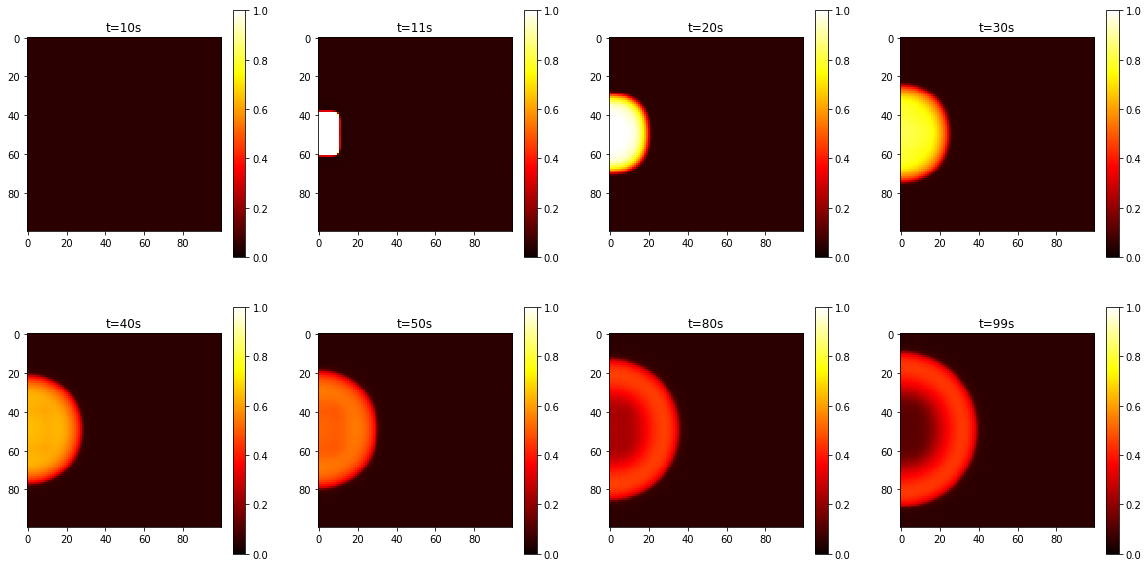

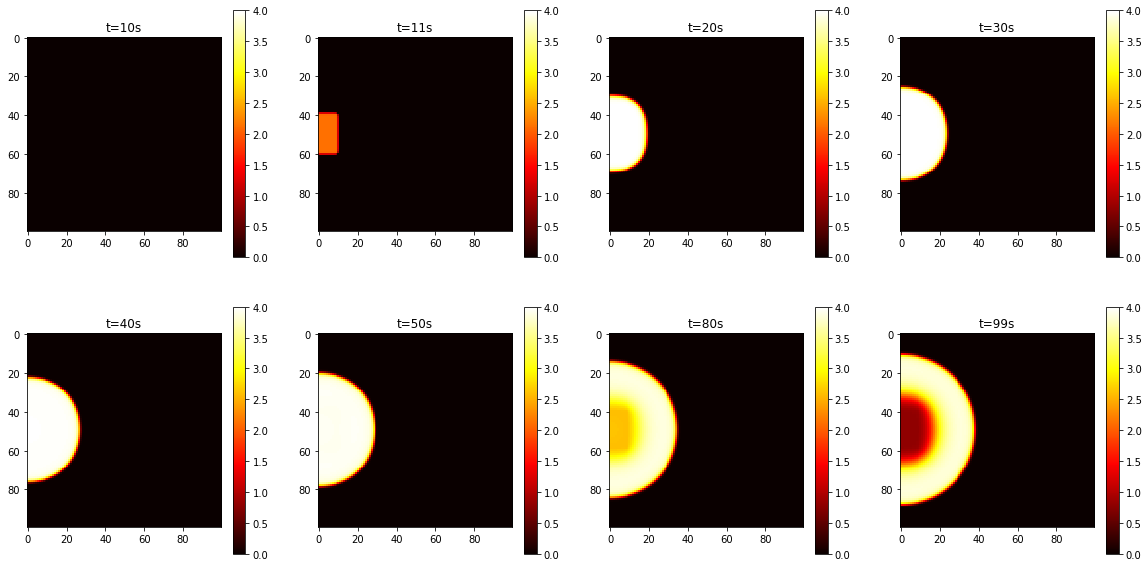

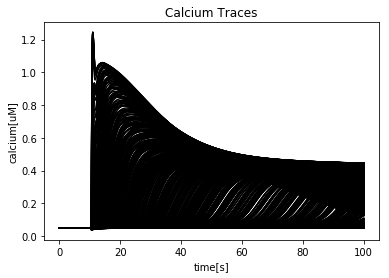

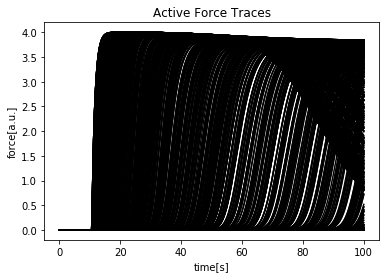

In [12]:
project = "100x100_100s_bending_k2_02_s0_600_v7_001"
save_interval = 50
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 6000, 8000)

100%|██████████| 10000/10000 [00:13<00:00, 748.24it/s]


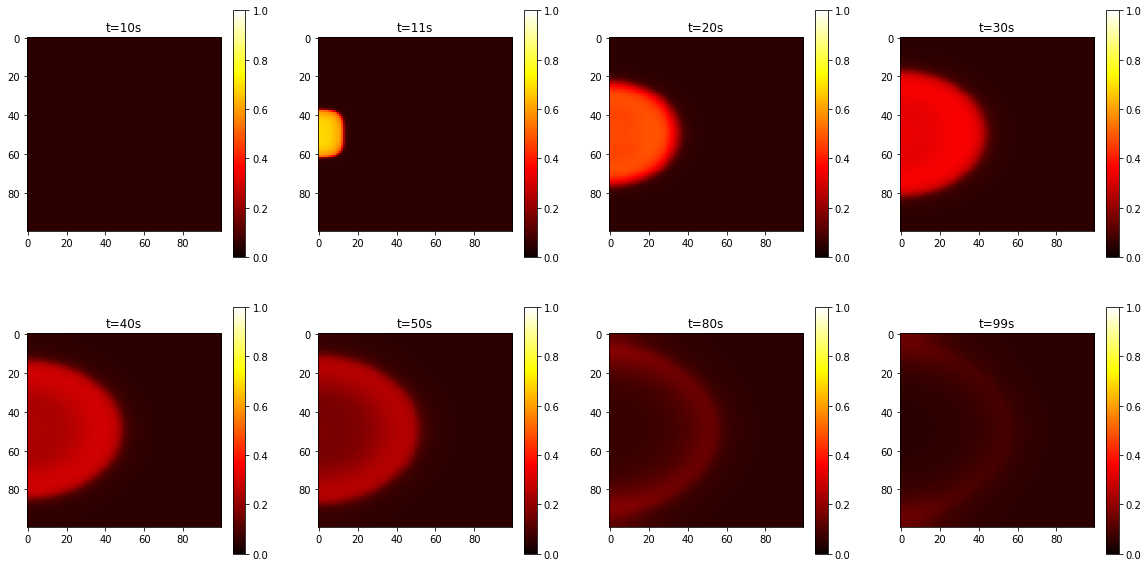

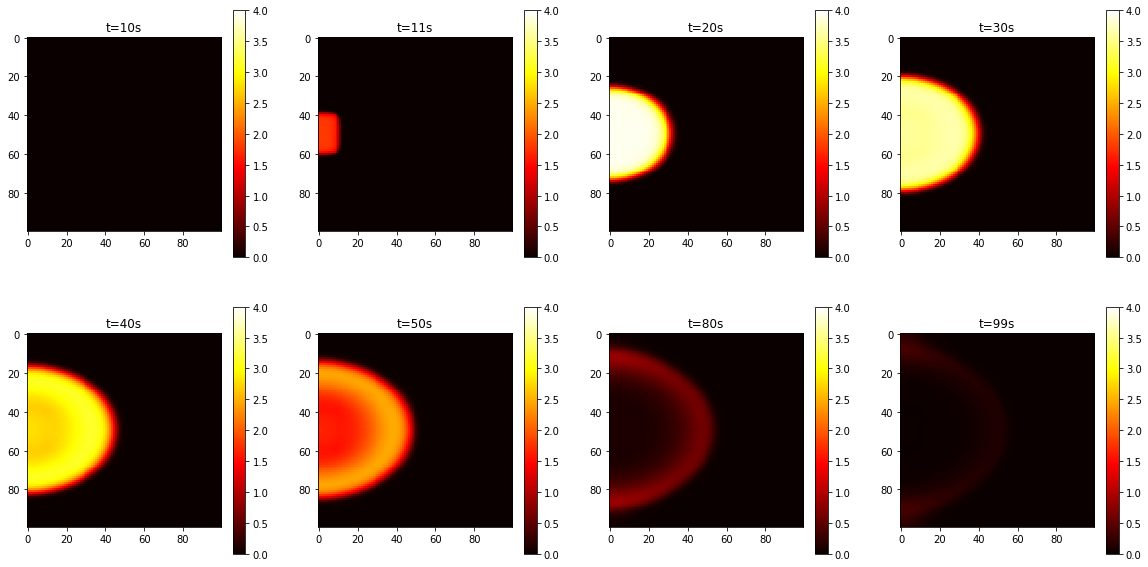

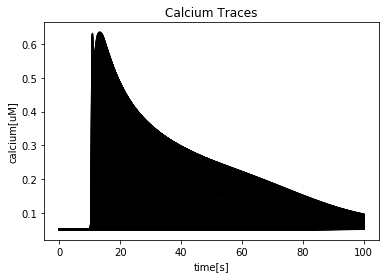

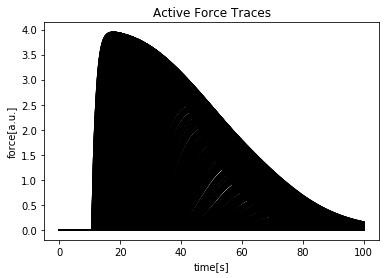

In [31]:
project = "100x100_100s_bending_k2_02_s0_200_v7_002_gip3x_10_gip3y_20"
save_interval = 50
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 6000, 8000)

100%|██████████| 10000/10000 [00:11<00:00, 835.57it/s]


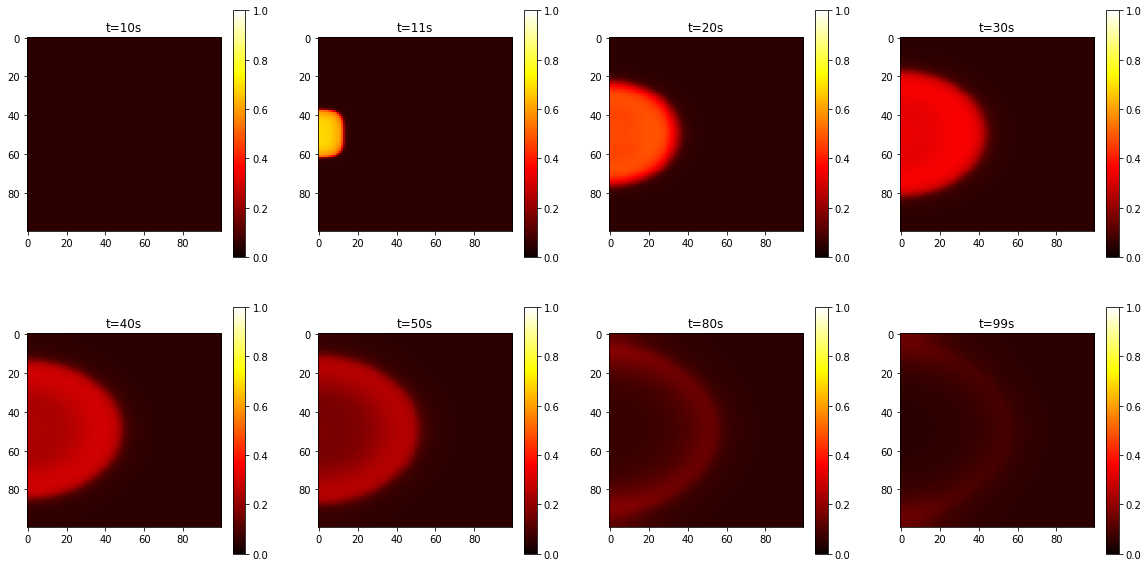

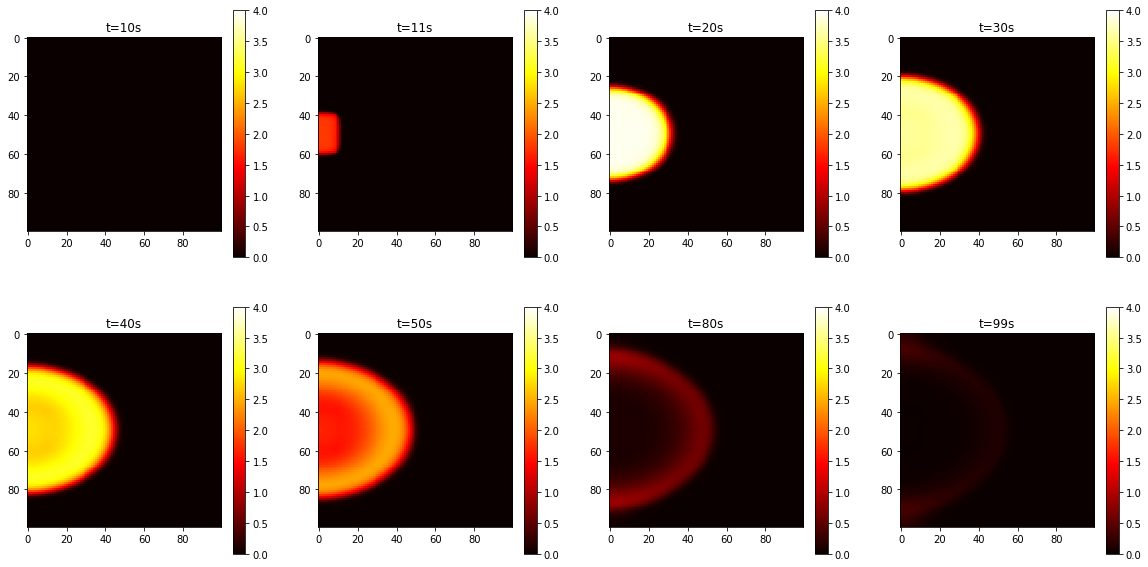

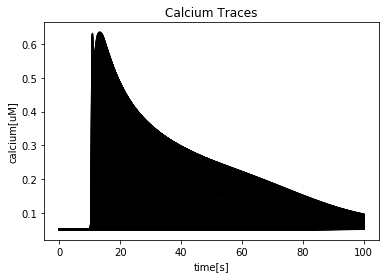

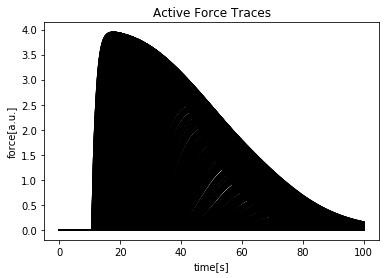

In [32]:
project = "100x100_100s_bending_k2_02_s0_200_v7_002_gip3x_10_gip3y_20"
save_interval = 50
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 6000, 8000)

100%|██████████| 10000/10000 [00:52<00:00, 189.33it/s]


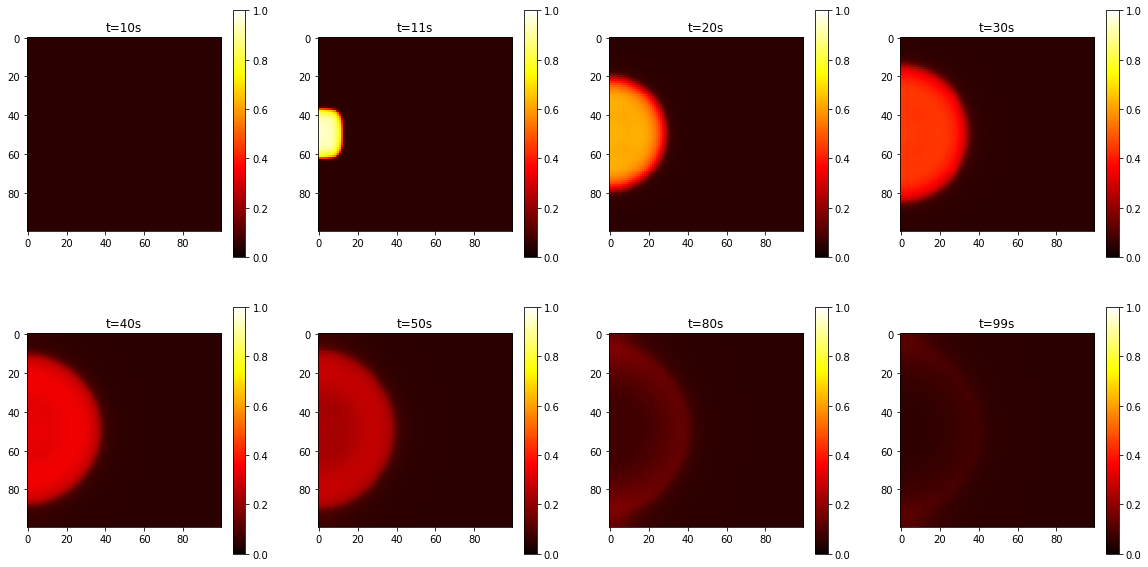

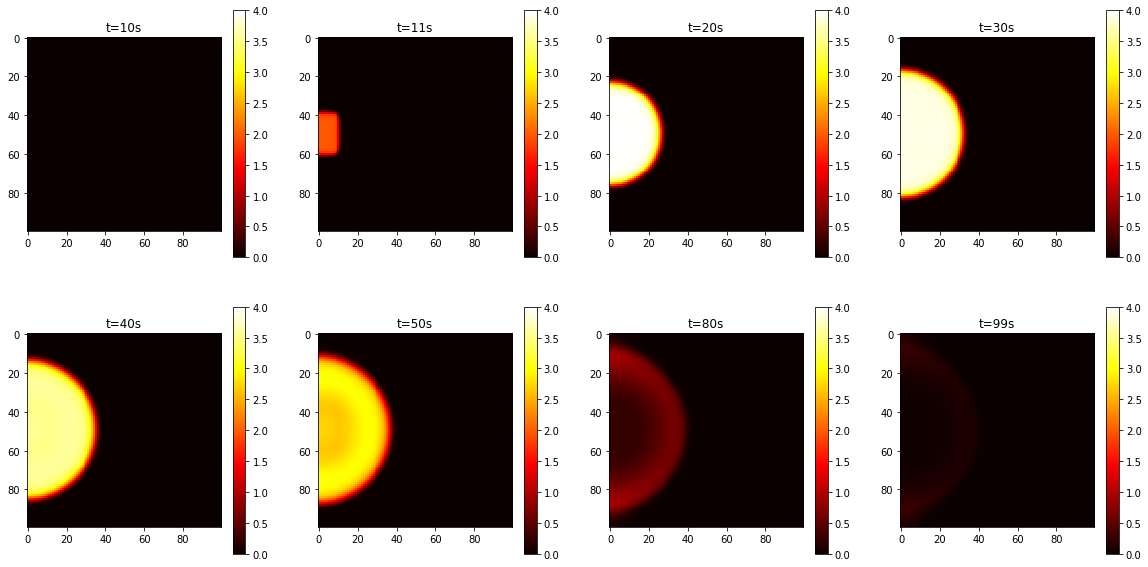

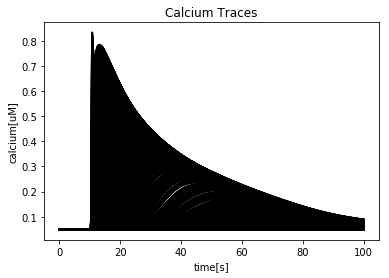

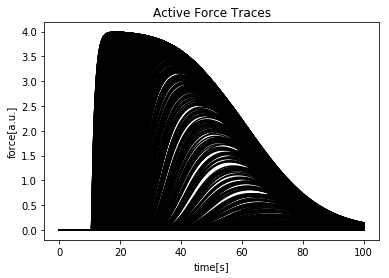

In [24]:
project = "100x100_100s_bending_k2_02_s0_300_v7_001_gip3_10"
save_interval = 50
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 6000, 8000)

100%|██████████| 5000/5000 [00:05<00:00, 838.32it/s]


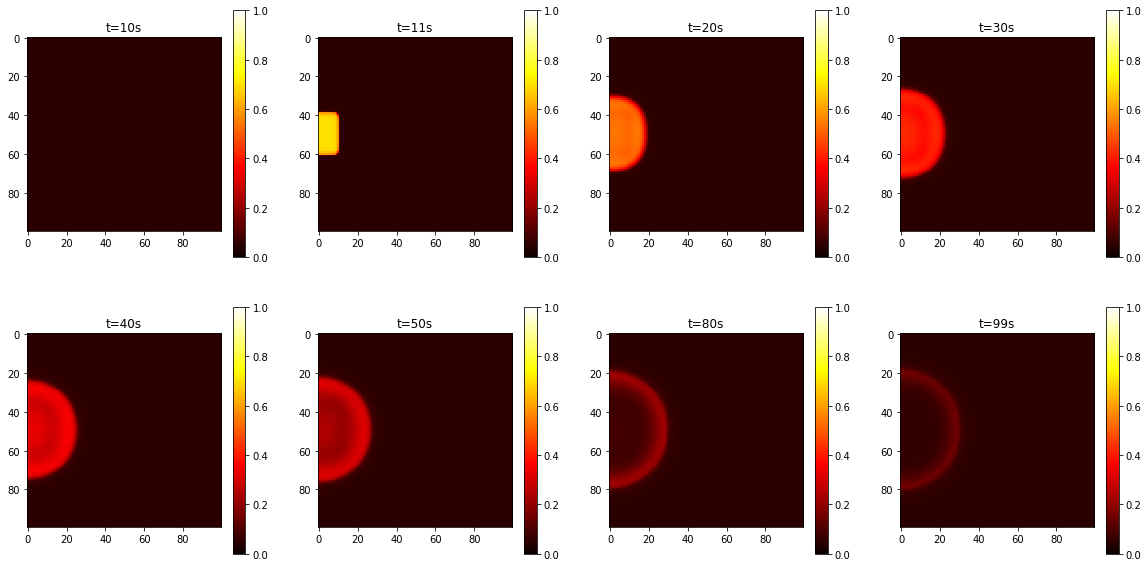

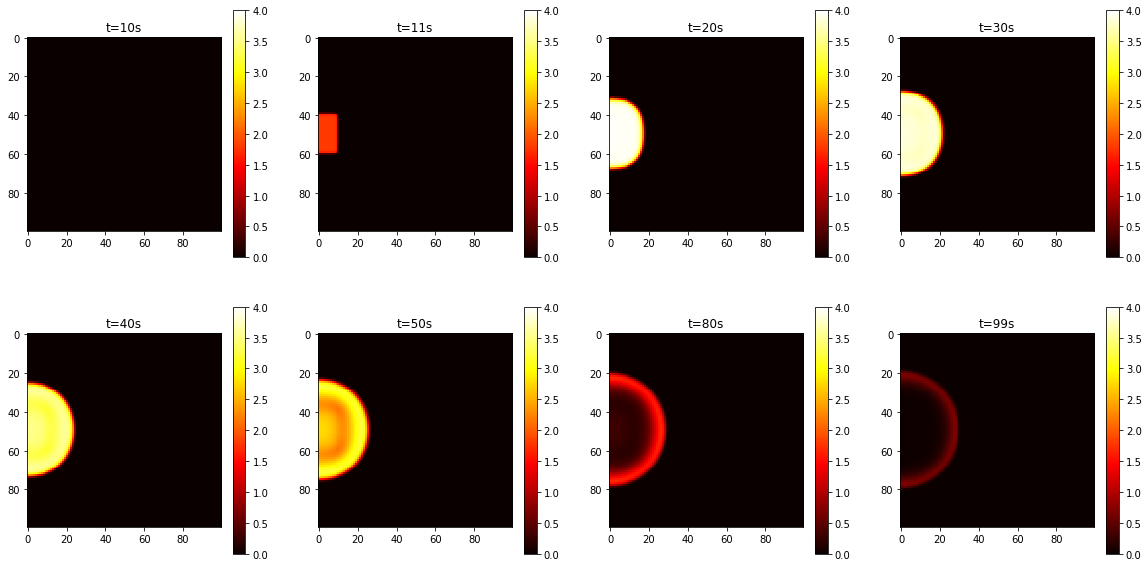

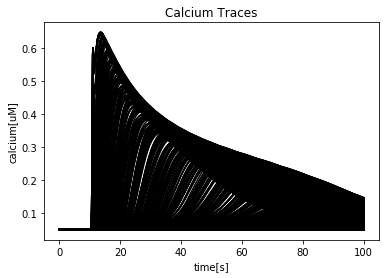

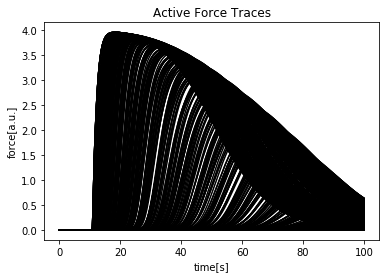

In [34]:
project = "100x100_100s_bending_ecto_small"
save_interval = 100
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 6000, 8000)

100%|██████████| 5000/5000 [00:06<00:00, 738.70it/s]


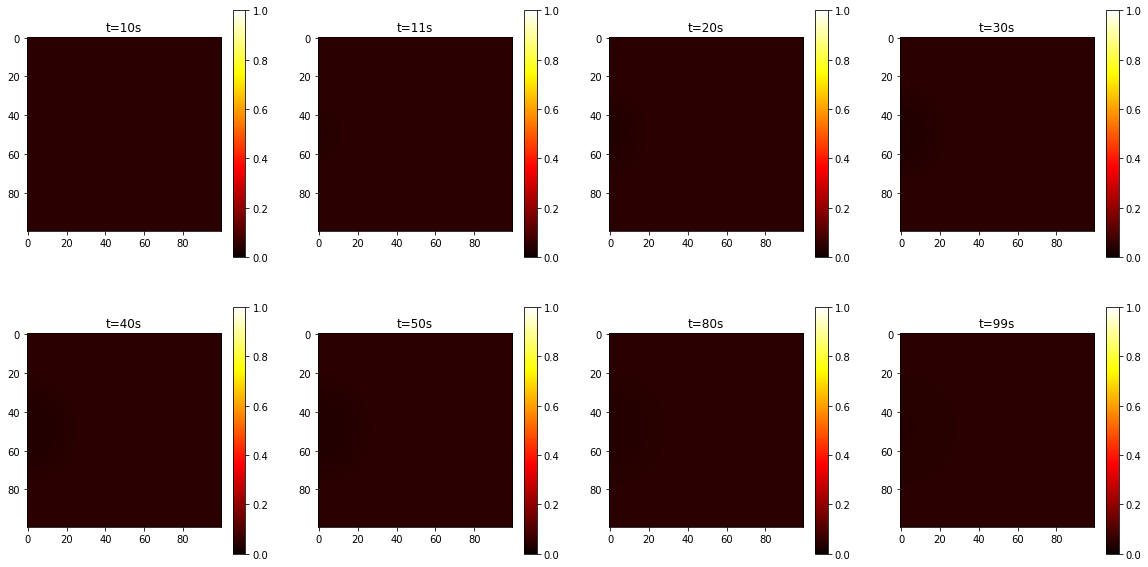

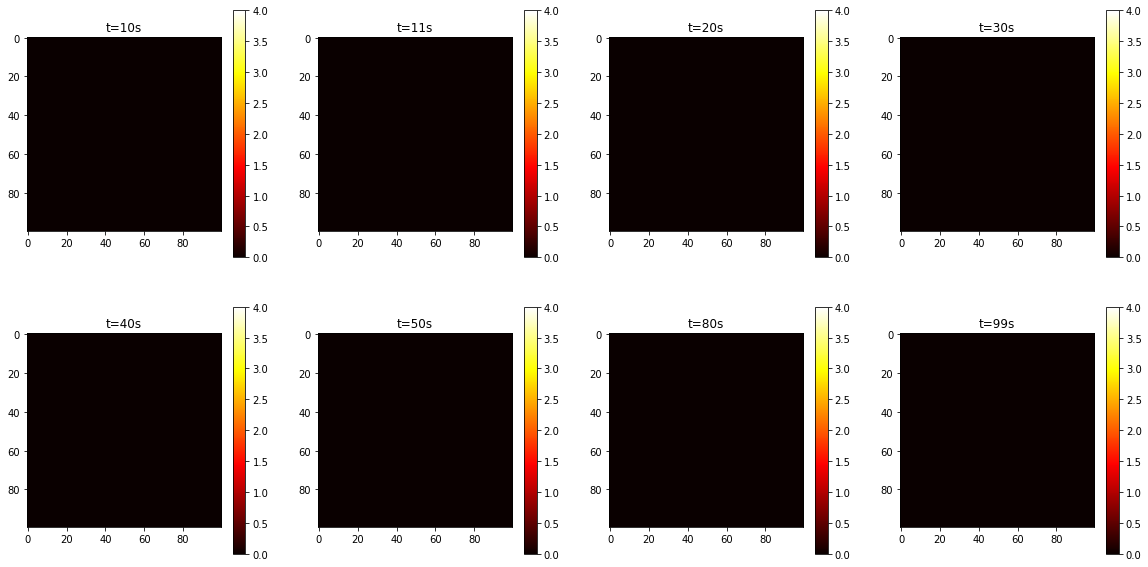

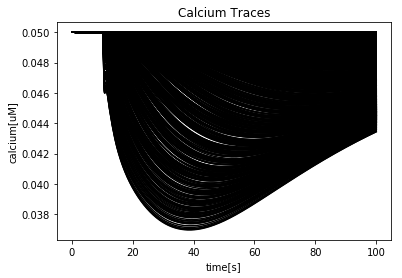

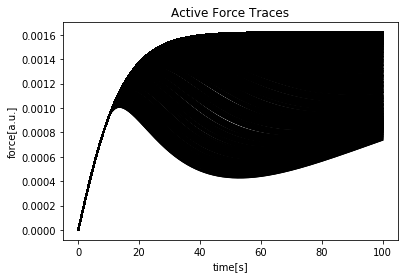

In [36]:
project = "100x100_100s_bending_endo_small"
save_interval = 100
time_list = [10, 11, 20, 30, 40, 50, 80, 99]
c, force = load_data(project, save_interval)
plot_results(time_list, save_interval, 6000, 8000)